In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.interpolate import make_interp_spline
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score
from sklearn.cluster import DBSCAN
df=pd.read_csv(r'Irish_DataSet\outlierFixedDataAllMeter.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Month", 2: "Time", 3: "Consumption"},inplace=True)
unique_meter_ids = df['ID'].unique()
# np.random.shuffle(unique_meter_ids)
meter_ids = unique_meter_ids[:50]

## summer

In [103]:
summer = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 195) & (meter_data['Month'] <= 244)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    summer.append(meter_data)

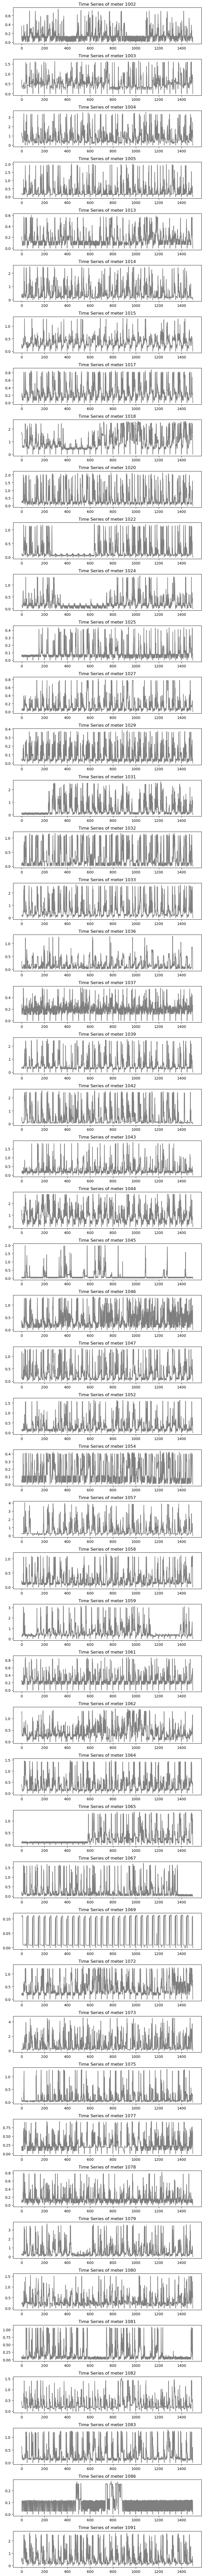

In [104]:
fig, axs = plt.subplots(len(summer), 1, figsize=(8, 2 * len(summer))) 

for yi in range(len(summer)):
    axs[yi].plot(summer[yi].ravel(), "k-", alpha=0.5)
    axs[yi].set_title(f"Time Series of meter {meter_ids[yi]}")
plt.tight_layout()
plt.show()

In [105]:
dbscan = DBSCAN(eps= 33 , min_samples= 1, metric='euclidean')
dbscan.fit(summer)
cluster_labels = dbscan.labels_

# Print the clusters and their sizes
unique_labels = set(cluster_labels)
for label in unique_labels:
    cluster_size = np.sum(cluster_labels == label)
    if label == -1:
        print(f'Noise: {cluster_size} data points')
    else:
        print(f'Cluster {label}: {cluster_size} data points')
# cluster_labels 

Cluster 0: 45 data points
Cluster 1: 1 data points
Cluster 2: 1 data points
Cluster 3: 1 data points
Cluster 4: 1 data points
Cluster 5: 1 data points


In [81]:
silhouette_avg = silhouette_score(summer, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(summer, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.43277588997983124
Davies-Bouldin Index: 0.39409847633496514


In [110]:
meter_1002_data = df[df['ID'] == 1002]
meter_1003_data = df[df['ID'] == 1003]

# Sort the data by 'Duration' for a smoother curve
meter_1002_data = meter_1002_data.sort_values(by='Time')
meter_1003_data = meter_1003_data.sort_values(by='Time')

# Interpolate the data for smoother curves
x1 = meter_1002_data['Time']
y1 = meter_1002_data['Consumption']
x2 = meter_1003_data['Time']
y2 = meter_1003_data['Consumption']

x_smooth1 = np.linspace(x1.min(), x1.max(), 300)  # Increase the number of points for smoother curve
y_smooth1 = make_interp_spline(x1, y1)(x_smooth1)
x_smooth2 = np.linspace(x2.min(), x2.max(), 300)  # Increase the number of points for smoother curve
y_smooth2 = make_interp_spline(x2, y2)(x_smooth2)

# Plot the consumption patterns of both meters in a single graph
plt.figure(figsize=(12, 6))
plt.plot(x_smooth1, y_smooth1, label='Meter 1002', linestyle='-', color='b')
plt.plot(x_smooth2, y_smooth2, label='Meter 1003', linestyle='-', color='g')
plt.title('Consumption Patterns for Meters 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()

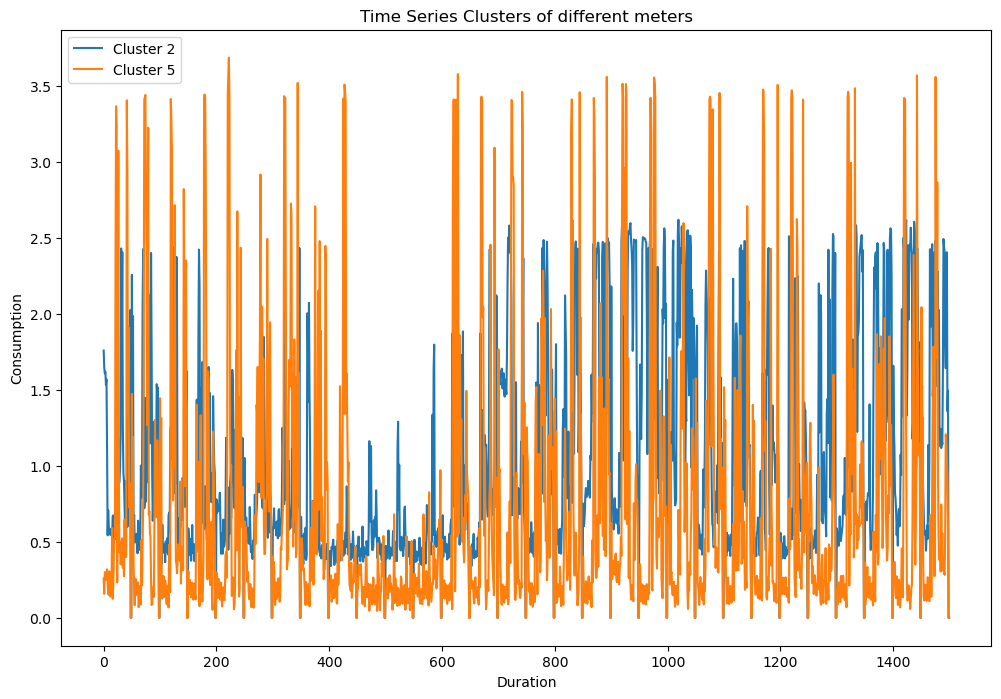

In [109]:
clusters_to_plot = [2, 5]  
plt.figure(figsize=(12, 8))

# Create a scatter plot with different colors for each cluster
for label in clusters_to_plot:
    cluster_data = [summer[i] for i in range(len(summer)) if cluster_labels[i] == label]
    for series in cluster_data:
        plt.plot(series, label=f'Cluster {label}')

plt.title("Time Series Clusters of different meters")
plt.xlabel("Duration")  
plt.ylabel("Consumption") 
plt.legend()
plt.show()

## autumn

In [49]:
autumn = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 245) & (meter_data['Month'] <= 307)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    autumn.append(meter_data)

In [54]:
dbscan = DBSCAN(eps = 32, min_samples= 1, metric='euclidean')
dbscan.fit(autumn)
cluster_labels = dbscan.labels_

# Print the clusters and their sizes
unique_labels = set(cluster_labels)
for label in unique_labels:
    cluster_size = np.sum(cluster_labels == label)
    if label == -1:
        print(f'Noise: {cluster_size} data points')
    else:
        print(f'Cluster {label}: {cluster_size} data points')
# cluster_labels 

Cluster 0: 47 data points
Cluster 1: 1 data points
Cluster 2: 1 data points
Cluster 3: 1 data points


In [55]:
silhouette_avg = silhouette_score(autumn, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(autumn, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.37290469246670477
Davies-Bouldin Index: 0.4180400638598018


## winter

In [99]:
winter = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 308) & (meter_data['Month'] <= 370)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    winter.append(meter_data)

In [100]:
dbscan = DBSCAN(eps = 31, min_samples= 1, metric='euclidean')
dbscan.fit(winter)
cluster_labels = dbscan.labels_

unique_labels = set(cluster_labels)
for label in unique_labels:
    cluster_size = np.sum(cluster_labels == label)
    if label == -1:
        print(f'Noise: {cluster_size} data points')
    else:
        print(f'Cluster {label}: {cluster_size} data points')
# cluster_labels 

Cluster 0: 47 data points
Cluster 1: 1 data points
Cluster 2: 1 data points
Cluster 3: 1 data points


In [101]:
silhouette_avg = silhouette_score(winter, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(winter, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.46143942094410073
Davies-Bouldin Index: 0.35785340664566745


## spring

In [1]:
# spring = []
# for meter_id in meter_ids:
#     meter_data = df[df['ID'] == meter_id] 
#     meter_data = meter_data[(meter_data['Month'] >= 432) & (meter_data['Month'] <= 526)] 
#     num_values_to_keep = 1500
#     meter_data = meter_data['Consumption'].values[:num_values_to_keep]
#     spring.append(meter_data)

In [2]:
# dbscan = DBSCAN(eps=25.9, min_samples= 1, metric='euclidean')
# dbscan.fit(summer)
# cluster_labels = dbscan.labels_

# # Print the clusters and their sizes
# unique_labels = set(cluster_labels)
# for label in unique_labels:
#     cluster_size = np.sum(cluster_labels == label)
#     if label == -1:
#         print(f'Noise: {cluster_size} data points')
#     else:
#         print(f'Cluster {label}: {cluster_size} data points')
# cluster_labels 